### Boston Housing Datasets

- CRIM : 자치시(town) 별 1인당 범죄율(%)
- ZN : 25,000 평방피트를 초과하는 거주지역의 비율
- INDUS : 비소매 상업 지역이 점유하고 있는 토지의 비율
- CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 10ppm 당 농축 일산화질소
- RM : 주택 1가구당 평균 방의 개수
- AGE : 1940년 이전에 건축된 소유주택의 비율
- DIS : 5개의 보스턴 직업센터까지의 접근성 지수
- RAD : 방사형 도로까지의 접근성 지수
- TAX : 10,000 달러 당 재산세율
- PTRATIO : 자치시(town)별 학생/교사 비율
- B : 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
- LSTAT : 모집단의 하위계층의 비율(%)
- MEDV : 본인 소유의 주택가격(중앙값) (단위: 1,000달러)

In [209]:
import os
os.getcwd()

'/Users/moogie/Desktop/myPyCode'

In [210]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [241]:
# column setting and read data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)

In [227]:
# 506 * 14 datasets
print(data.shape)
data.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [213]:
# 데이터 분포 요약
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot: >

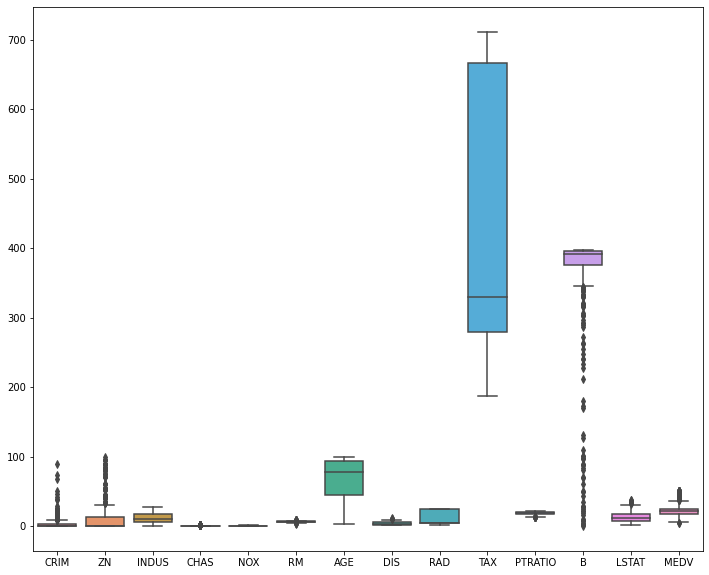

In [214]:
# 변수가 값의 규모의 차이가 크므로 정규화 필요함
import seaborn as sns
plt.figure(figsize=(12,10))
sns.boxplot(data=data)

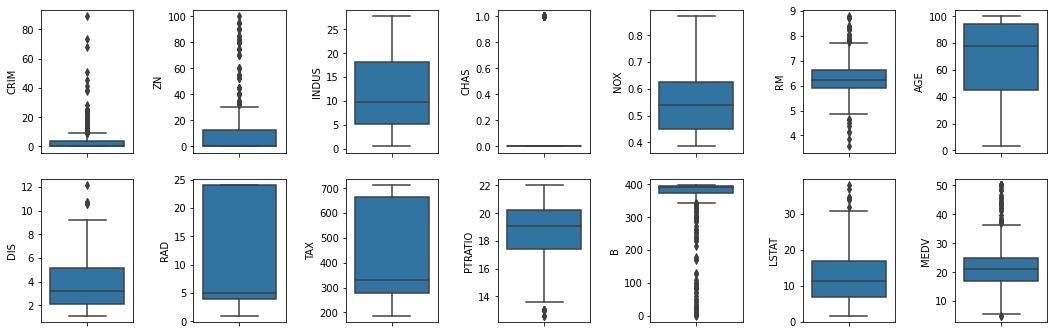

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0; axs = axs.flatten()
for val_name, val_data in data.items():
    sns.boxplot(y=val_name, data=data, ax=axs[index])
    index = index + 1
    
plt.tight_layout(pad=20, w_pad=2, h_pad=2)

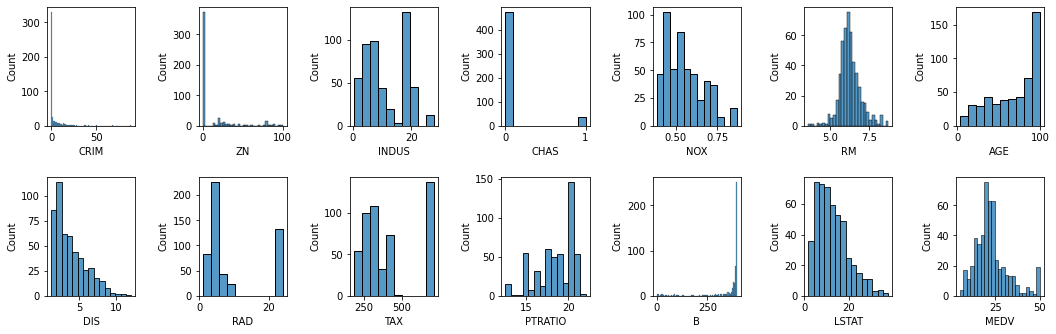

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0; axs = axs.flatten()
for val_name, val_data in data.items():
    sns.histplot(val_data, ax=axs[index])
    index = index + 1
    
plt.tight_layout(pad=20, w_pad=2, h_pad=2)

In [217]:
# IQR을 이용한 극단치에 해당되는 값들이 있지만 정상적이라고 판단
for name in data.keys() :
    tmp = data[name]
    q1 = tmp.quantile(0.25)
    q3 = tmp.quantile(0.75)
    IQR = q3 - q1
    n = len(tmp[(tmp<=q1-1.5*IQR) | (tmp>=q3+1.5*IQR)])
    print(name, n)

CRIM 66
ZN 68
INDUS 0
CHAS 506
NOX 0
RM 30
AGE 0
DIS 5
RAD 0
TAX 0
PTRATIO 15
B 77
LSTAT 7
MEDV 40


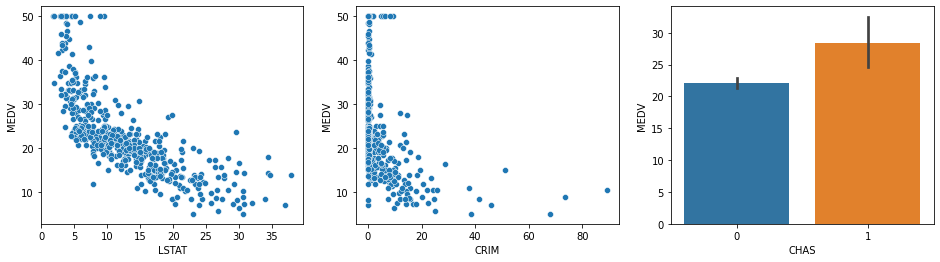

In [218]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(y="MEDV", x="LSTAT", data=data)

plt.subplot(1,3,2)
sns.scatterplot(y="MEDV", x="CRIM", data=data)

plt.subplot(1,3,3)
sns.barplot(y="MEDV", x="CHAS", data=data)
plt.show()

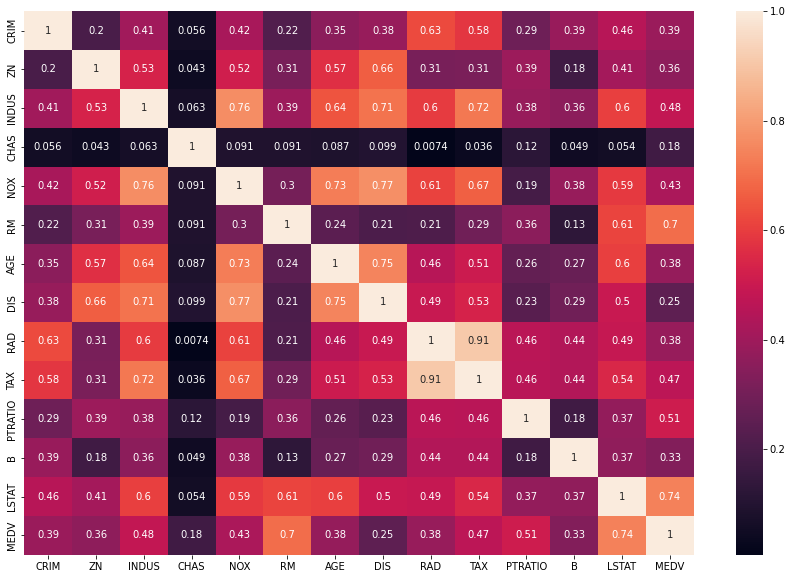

In [219]:
# 상관관계 시각화
# RAD와 TAX의 상관성이 높은 것을 확인
plt.figure(figsize=(15,10))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

In [242]:
from sklearn import preprocessing
sc = preprocessing.MinMaxScaler().fit(data)
data = sc.transform(data)

In [243]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [244]:
from sklearn.model_selection import train_test_split
y = data[:,-1]
data = data[:, 0:-1]
train_x, test_x, train_y, test_y = train_test_split(data, y, test_size=0.2)

In [245]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [246]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu", input_shape=(13,)),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1)])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss = tf.keras.losses.mse)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [247]:
history = model.fit(train_x, train_y, epochs=50, batch_size=64, validation_split=0.25)

Epoch 1/50
5/5 [==============================] - 1s 33ms/step - loss: 0.5839 - val_loss: 0.0499
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0719 - val_loss: 0.0738
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0535 - val_loss: 0.0453
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0332 - val_loss: 0.0316
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0289 - val_loss: 0.0236
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0233 - val_loss: 0.0206
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0190 - val_loss: 0.0182
Epoch 8/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0157 - val_loss: 0.0154
Epoch 9/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0130 - val_loss: 0.0154
Epoch 10/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0110 - val_loss: 0.0138
Epoch 11/50
5/5 [=================

In [240]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 5ms/step - loss: 0.0081


0.008120447397232056

4/4 [==============================] - 0s 4ms/step


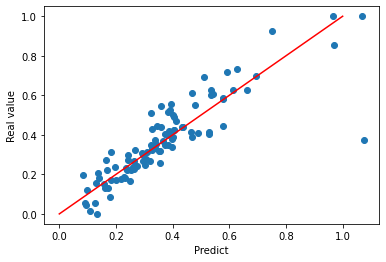

In [260]:
pred = model.predict(test_x)
real = test_y
line_x = np.arange(0, 1, 0.1)

plt.scatter(pred, real)
plt.plot([0,1],[0,1],"r-")
plt.xlabel("Predict")
plt.ylabel("Real value")
plt.show()

In [248]:
data

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])